# Muthuri Ian-17g01abt017

In [1]:
pip install nltk

     |████████████████████████████████| 1.4 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 723 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 4.5 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=705cfc022643c5da4410ea1134ee788b92b7c3ea14709d32148ddd061467ca87
  Stored in directory: /home/jovyan/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


# import All libraries needed

In [89]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string


# Read Csv file

In [90]:

df = pd.read_csv("https://raw.githubusercontent.com/ianSurii/nltk/main/Tweets.csv", encoding="iso-8859-1")


# Hader of the dataframe

In [91]:
df.head(3)

,Date,tweet
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...


# Drop Duplicates From the DataFrame & Remove empty rows and duplicates

In [94]:
df = df.drop_duplicates()
df.drop
df.shape
tweets = df["tweet"]

In [95]:
df.head(3)

,Date,tweet
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...


# Display the Punctuition Format for Strings-Non Alpha-neumeric

In [107]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Remove non-alphanumeric characters

In [106]:

def clear_punctions(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]', '', text)
    return text
df["cleaned"] = df["tweet"].apply(lambda x: remove_punct(x))
df.head()


,Date,tweet,cleaned,tokenized
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...,ComedyCentralKE These words can kill a Luhya W...,"[ComedyCentralKE, These, words, can, kill, a, ..."
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...,The little luhya that remains in me always ...,"[The, little, luhya, that, remains, in, me, al..."
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...,cheernatwildcat kill it at battle this weekend...,"[cheernatwildcat, kill, it, at, battle, this, ..."
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...,HomeboyzRadio HBR luv dat luhya hit luhyas alw...,"[HomeboyzRadio, HBR, luv, dat, luhya, hit, luh..."
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...,HangOutFriday hahaha ball ya terby derby Luhy...,"[HangOutFriday, hahaha, ball, ya, terby, derby..."


In [102]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenize the  Tweets and Display head(3)

In [103]:
from nltk.tokenize import word_tokenize
Tweets_punct = df["cleaned"] 
tokens = []
for each in Tweets_punct:
    tokens.append(word_tokenize(each))
tokens =[]
for each in word_tokens:
    tokens.append(each)
df["tokenized"] = tokens
df.head(3)

,Date,tweet,cleaned,tokenized
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...,ComedyCentralKE These words can kill a Luhya W...,"[ComedyCentralKE, These, words, can, kill, a, ..."
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...,The little luhya that remains in me always ...,"[The, little, luhya, that, remains, in, me, al..."
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...,cheernatwildcat kill it at battle this weekend...,"[cheernatwildcat, kill, it, at, battle, this, ..."


In [104]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Remove stop words

In [105]:
stopword = nltk.corpus.stopwords.words('english')
results = []
for c in tokens:
    for d in c:
        if d not in stopword:
            results.append(d)
len(results)


146429

In [59]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Perform a Part of speech tagging

In [61]:
tags = nltk.pos_tag(results)
print(tags)

[('ComedyCentralKE', 'NNP'), ('These', 'DT'), ('words', 'NNS'), ('kill', 'VBP'), ('Luhya', 'NNP'), ('Wacha', 'NNP'), ('Ugali', 'NNP'), ('ipoe', 'VBZ'), ('The', 'DT'), ('little', 'JJ'), ('luhya', 'NN'), ('remains', 'VBZ'), ('always', 'RB'), ('Sitokingi', 'NNP'), ('kills', 'VBZ'), ('cheernatwildcat', 'NN'), ('kill', 'VB'), ('battle', 'NN'), ('weekend', 'NN'), ('wildcat', 'NN'), ('luhya', 'JJ'), ('HomeboyzRadio', 'NNP'), ('HBR', 'NNP'), ('luv', 'VBZ'), ('dat', 'JJ'), ('luhya', 'NN'), ('hit', 'VBD'), ('luhyas', 'JJ'), ('always', 'RB'), ('kill', 'VBP'), ('awoooh', 'JJ'), ('HangOutFriday', 'NNP'), ('hahaha', 'VBD'), ('ball', 'DT'), ('ya', 'NN'), ('terby', 'RB'), ('derby', 'JJ'), ('Luhyas', 'NNP'), ('kill', 'NN'), ('Luos', 'NNP'), ('donâ\x80\x99t', 'NN'), ('kill', 'NN'), ('blood', 'NN'), ('thirsty', 'JJ'), ('killers', 'NNS'), ('two', 'CD'), ('tribes', 'NNS'), ('Same', 'NNP'), ('police', 'NNS'), ('kill', 'VB'), ('luos', 'FW'), ('bondo', 'FW'), ('shot', 'NN'), ('grannies', 'NNS'), ('migori', 'V

In [74]:
freqDist = nltk.FreqDist(results)
freqDist.most_common
#print(freqDist)


<bound method Counter.most_common of FreqDist({'I': 1672, 'Nyakundi': 1261, 'https': 1155, 'NoReformsNoElections': 1110, 'â\x80¦': 1106, 'Kikuyus': 810, 'RIPMsando': 741, 'Luos': 740, 'kikuyus': 728, 'na': 710, ...})>

In [76]:
pip install wordcloud

     |████████████████████████████████| 366 kB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Create a word cloud of the cleaned data

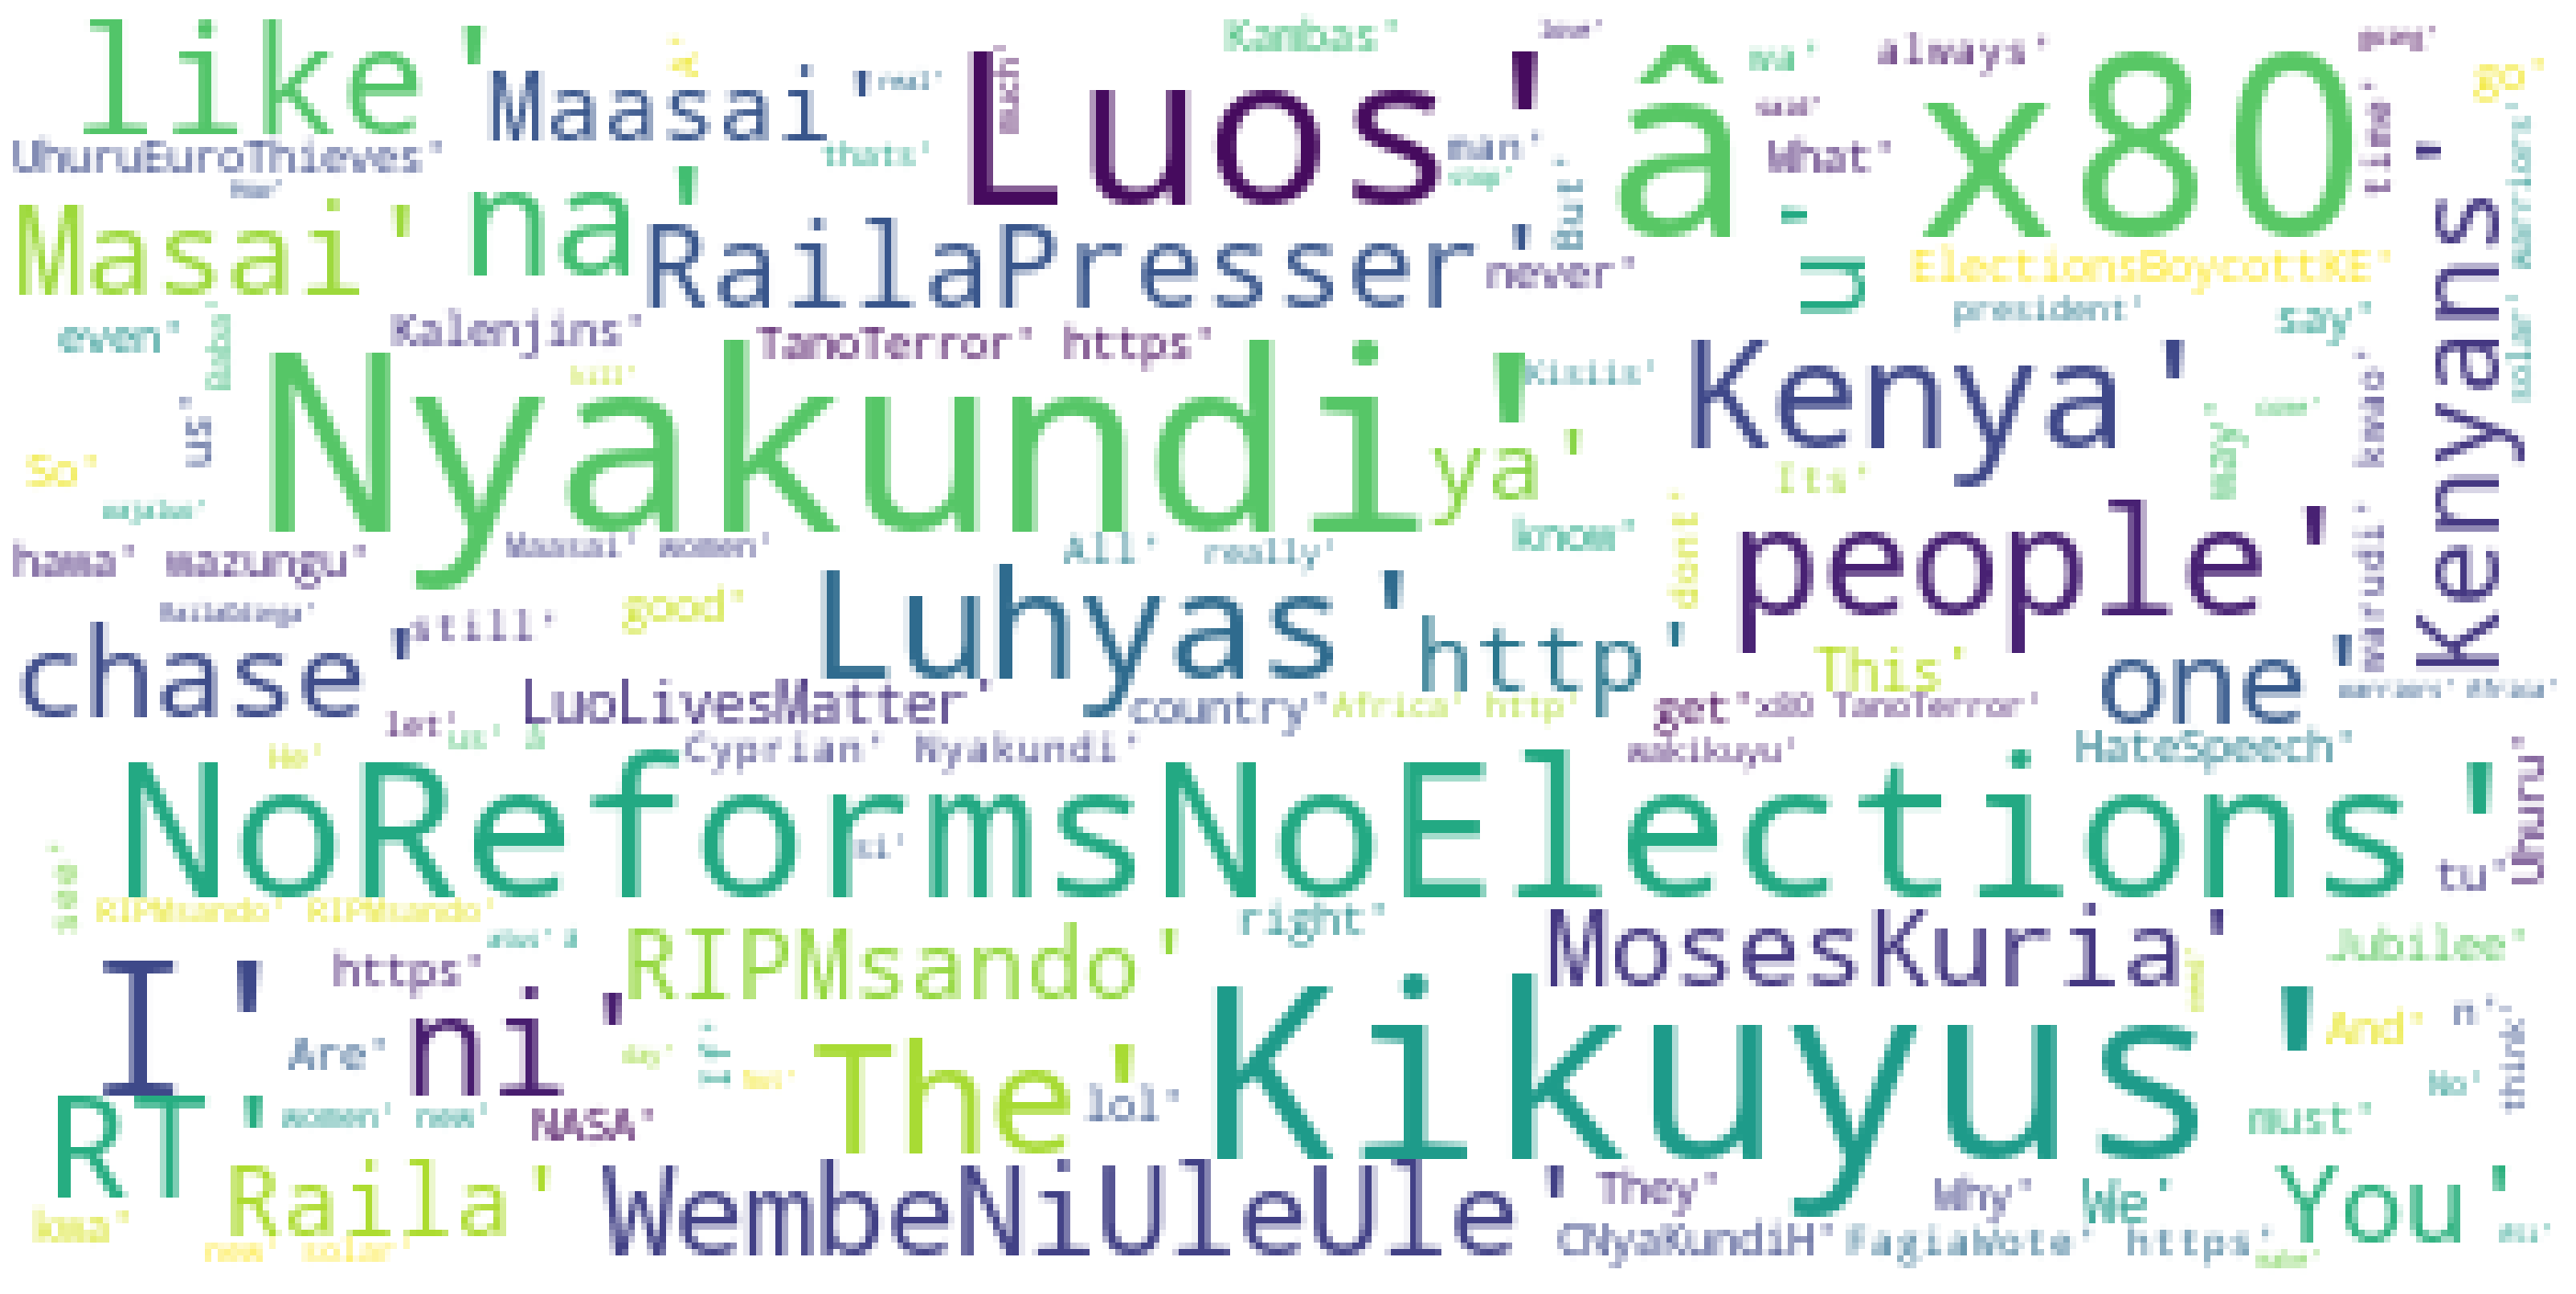

In [108]:
from wordcloud import WordCloud, STOPWORDS
stopoword = STOPWORDS
word_cloud = WordCloud(background_color="white", stopwords=stopword, max_font_size=40, random_state=42).generate(str(results))
wordcloud_figure = plt.figure(figsize=(50,50))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()